In [1]:
#importing Libraries :)

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten,Input, Activation, Layer, Lambda
from keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import History 
history = History()

import matplotlib.pyplot as plt

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#load dataset

dataset=pd.read_csv("covtype.csv")

In [3]:
dataset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
dataset.shape

(581012, 55)

In [5]:
#check for null values
dataset.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


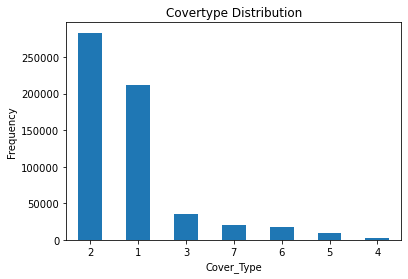

In [6]:
count_classes = pd.value_counts(dataset['Cover_Type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Covertype Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Frequency")
plt.savefig("Covertype Distribution")
plt.show()

In [7]:
y = dataset.iloc[:,-1].values
x = dataset.drop(["Cover_Type"],axis=1)
x.shape,y.shape

((581012, 54), (581012,))

In [8]:
cov1 = dataset[dataset['Cover_Type']==1]
cov2 = dataset[dataset['Cover_Type']==2]
cov3 = dataset[dataset['Cover_Type']==3]
cov4 = dataset[dataset['Cover_Type']==4]
cov5 = dataset[dataset['Cover_Type']==5]
cov6 = dataset[dataset['Cover_Type']==6]
cov7 = dataset[dataset['Cover_Type']==7]
print(cov1.shape,cov2.shape,cov3.shape,cov4.shape,cov5.shape,cov6.shape,cov7.shape)

(211840, 55) (283301, 55) (35754, 55) (2747, 55) (9493, 55) (17367, 55) (20510, 55)


In [9]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res,y_res=nm.fit_sample(x,y)

In [10]:
X_res.shape,y_res.shape

((19229, 54), (19229,))

In [11]:
X_res

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2466,354,20,0,0,807,182,201,153,1463,...,0,0,1,0,0,0,0,0,0,0
1,2531,23,9,42,0,735,215,221,142,890,...,0,0,0,0,0,0,0,0,0,0
2,2533,36,4,30,0,750,220,230,147,860,...,0,0,0,0,0,0,0,0,0,0
3,2530,20,6,30,-3,742,216,228,149,875,...,0,0,0,0,0,0,0,0,0,0
4,2470,309,10,0,0,828,193,234,181,1455,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3290,334,22,277,64,1905,163,204,177,467,...,0,0,0,0,0,0,0,0,1,0
19225,3284,47,24,808,188,1253,220,182,84,1816,...,0,0,0,0,0,0,0,0,0,1
19226,3412,328,38,277,152,1054,103,166,186,1577,...,0,0,0,0,0,0,0,0,1,0
19227,3271,286,12,342,113,930,186,240,194,2255,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X_res.to_numpy()

array([[2466,  354,   20, ...,    0,    0,    0],
       [2531,   23,    9, ...,    0,    0,    0],
       [2533,   36,    4, ...,    0,    0,    0],
       ...,
       [3412,  328,   38, ...,    0,    1,    0],
       [3271,  286,   12, ...,    0,    1,    0],
       [3395,   34,   10, ...,    0,    0,    1]], dtype=int64)

In [13]:
X_res.shape

(19229, 54)

In [14]:
#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)

In [15]:
#spliting the dataset into train and test set

x_train,x_test,y_train,y_test= train_test_split(x_scaled,y_res,test_size = 0.1, random_state = 0)
x_train,x_val,y_train,y_val= train_test_split(x_train,y_train,test_size = 0.2, random_state = 0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13844, 54)
(1923, 54)
(3462, 54)


In [17]:
input_data = Input(shape=(54,))
encoded = Dense(3, activation='relu',activity_regularizer = regularizers.l1(1e-6))(input_data)
decoded = Dense(54, activation='sigmoid')(encoded)

In [18]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(loss="mse",optimizer='Adam')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 165       
_________________________________________________________________
dense_2 (Dense)              (None, 54)                216       
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = autoencoder.fit(x_train, x_train,
                epochs=800,
                batch_size=512,
                shuffle=True,
                validation_data=(x_val, x_val))

Train on 13844 samples, validate on 3462 samples
Epoch 1/800
13844/13844 [==============================] - 0s 10us/step - loss: 0.2148 - val_loss: 0.2098
Epoch 2/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.2045 - val_loss: 0.1973
Epoch 3/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.1878 - val_loss: 0.1749
Epoch 4/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.1602 - val_loss: 0.1423
Epoch 5/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.1263 - val_loss: 0.1092
Epoch 6/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0963 - val_loss: 0.0837
Epoch 7/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0750 - val_loss: 0.0671
Epoch 8/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0619 - val_loss: 0.0573
Epoch 9/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0542 - val_loss: 0.0515
Epoch

Epoch 78/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0226 - val_loss: 0.0226
Epoch 79/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0225 - val_loss: 0.0225
Epoch 80/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0224 - val_loss: 0.0224
Epoch 81/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0223 - val_loss: 0.0223
Epoch 82/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0222 - val_loss: 0.0223
Epoch 83/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0221 - val_loss: 0.0222
Epoch 84/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0221 - val_loss: 0.0221
Epoch 85/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0220 - val_loss: 0.0220
Epoch 86/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0219 - val_loss: 0.0219
Epoch 87/800
13844/13844 [====================

13844/13844 [==============================] - 0s 5us/step - loss: 0.0193 - val_loss: 0.0194
Epoch 155/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0193 - val_loss: 0.0193
Epoch 156/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0193 - val_loss: 0.0193
Epoch 157/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0192 - val_loss: 0.0193
Epoch 158/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0192 - val_loss: 0.0193
Epoch 159/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0192 - val_loss: 0.0192
Epoch 160/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0192 - val_loss: 0.0192
Epoch 161/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0191 - val_loss: 0.0192
Epoch 162/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0191 - val_loss: 0.0192
Epoch 163/800
13844/13844 [========================

13844/13844 [==============================] - 0s 4us/step - loss: 0.0178 - val_loss: 0.0179
Epoch 231/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0178 - val_loss: 0.0179
Epoch 232/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 233/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 234/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0178 - val_loss: 0.0178
Epoch 235/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0177 - val_loss: 0.0178
Epoch 236/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0177 - val_loss: 0.0178
Epoch 237/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0177 - val_loss: 0.0178
Epoch 238/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0177 - val_loss: 0.0177
Epoch 239/800
13844/13844 [========================

13844/13844 [==============================] - 0s 4us/step - loss: 0.0168 - val_loss: 0.0168
Epoch 307/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0168 - val_loss: 0.0168
Epoch 308/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0168
Epoch 309/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0168
Epoch 310/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0168
Epoch 311/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0168
Epoch 312/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0168
Epoch 313/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 314/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0167 - val_loss: 0.0167
Epoch 315/800
13844/13844 [========================

13844/13844 [==============================] - 0s 5us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 383/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0159 - val_loss: 0.0159
Epoch 384/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0158 - val_loss: 0.0159
Epoch 385/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0158 - val_loss: 0.0159
Epoch 386/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0158 - val_loss: 0.0159
Epoch 387/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0158 - val_loss: 0.0159
Epoch 388/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0158 - val_loss: 0.0158
Epoch 389/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0158 - val_loss: 0.0158
Epoch 390/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0158 - val_loss: 0.0158
Epoch 391/800
13844/13844 [========================

13844/13844 [==============================] - 0s 6us/step - loss: 0.0148 - val_loss: 0.0149
Epoch 459/800
13844/13844 [==============================] - 0s 6us/step - loss: 0.0148 - val_loss: 0.0149
Epoch 460/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0148 - val_loss: 0.0149
Epoch 461/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 462/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 463/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 464/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 465/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 466/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0148 - val_loss: 0.0148
Epoch 467/800
13844/13844 [========================

13844/13844 [==============================] - 0s 5us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 535/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 536/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 537/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 538/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 539/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 540/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 541/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0144 - val_loss: 0.0144
Epoch 542/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0143 - val_loss: 0.0144
Epoch 543/800
13844/13844 [========================

13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0142
Epoch 611/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0142
Epoch 612/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0142
Epoch 613/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0142
Epoch 614/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0141 - val_loss: 0.0142
Epoch 615/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0141 - val_loss: 0.0141
Epoch 616/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0141
Epoch 617/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0141
Epoch 618/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0141 - val_loss: 0.0141
Epoch 619/800
13844/13844 [========================

13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 687/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 688/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 689/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 690/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 691/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 692/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 693/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 694/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 695/800
13844/13844 [========================

13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 763/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 764/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 765/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 766/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 767/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 768/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0135 - val_loss: 0.0135
Epoch 769/800
13844/13844 [==============================] - 0s 5us/step - loss: 0.0135 - val_loss: 0.0134
Epoch 770/800
13844/13844 [==============================] - 0s 4us/step - loss: 0.0135 - val_loss: 0.0134
Epoch 771/800
13844/13844 [========================

In [20]:
evaluation = autoencoder.evaluate(x_test, x_test)
print("Loss:",evaluation)

1923/1923 [==============================] - 0s 20us/step
Loss: 0.012088160689927937


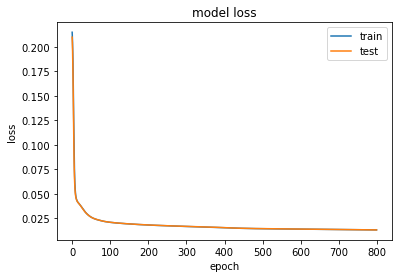

In [32]:
# Plot training loss and validation split loss over the epochs
#print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('sparseAE_model_loss.png')
plt.show()

In [22]:
evaluation = autoencoder.evaluate(x_test, x_test)

print("Loss:",evaluation)
data = autoencoder.predict(x_test)

1923/1923 [==============================] - 0s 20us/step
Loss: 0.012088160689927937


In [23]:
encoder = Model(input_data, encoded)
latent_vector_train = encoder.predict(x_train)
latent_vector = encoder.predict(x_test)

In [24]:
latent_vector.shape

(1923, 3)

In [25]:
latent_vector

array([[0.13234334, 0.63010454, 1.0968231 ],
       [0.36953294, 1.6777254 , 0.38391304],
       [1.769618  , 0.30820775, 0.5629495 ],
       ...,
       [1.8018973 , 0.        , 0.610796  ],
       [0.        , 0.38017303, 0.7586643 ],
       [1.8727887 , 0.        , 0.7552465 ]], dtype=float32)

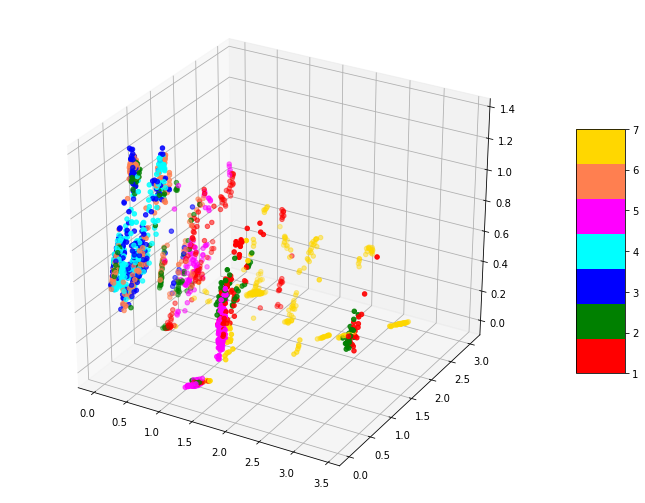

In [31]:
import matplotlib
%matplotlib inline
from mpl_toolkits import mplot3d
colors=['red','green','blue','cyan','magenta','coral','gold']
plt.figure(figsize =(12, 9))
ax = plt.axes(projection='3d')
surf = ax.scatter3D(latent_vector[:, 0], latent_vector[:, 1], latent_vector[:, 2], c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
# Add a color bar which maps values to colors.
cb = plt.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('sparseAE_3d.png')
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knnscores = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(latent_vector_train, y_train)
    k = knn.score(latent_vector,y_test)
    knnscores.append(k)

s = np.array(knnscores)
result = np.where(s == s.max())
print('Knn Score : ',s.max(),'and k : ', result[0])

Knn Score :  0.7847113884555382 and k :  [5]


In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(latent_vector)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Mean Absolute Error: 0.516900676027041
Mean Squared Error: 1.5819032761310452
Root Mean Squared Error: 1.2577373637334008
[[218  20   0   0  28   1   2]
 [ 18 206  13   3  12  17   0]
 [  0  12 169  59   0  27   0]
 [  0   2  50 192   0  22   0]
 [ 27   9   0   0 249   1   0]
 [  1  32  45  18   1 177   0]
 [  1   1   0   0   1   0 289]]
              precision    recall  f1-score   support

           1       0.82      0.81      0.82       269
           2       0.73      0.77      0.75       269
           3       0.61      0.63      0.62       267
           4       0.71      0.72      0.71       266
           5       0.86      0.87      0.86       286
           6       0.72      0.65      0.68       274
           7       0.99      0.99      0.99       292

    accuracy                           0.78      1923
   macro avg       0.78      0.78      0.78      1923
weighted avg       0.78      0.78      0.78      1923

